## Linear and Polynomial Regression
Aim: To practice Linear Regression and Polynomial Regression using Python code. The activity also helps in understanding the difference between Linear Regression and Polynomial Regression.

Data: The dataset includes Annual Production-based Emissions of Carbon Dioxide (CO2) by China, measured in million tonnes per year, for the span 1902-2018.

Data Source: Carbon Dioxide Information Analysis Center (CDIAC) and Global Carbon Project

The code and the dataset are avaialable for download.
Developed by TROP ICSU (https://tropicsu.org).

The complete Lesson Plan is available here:https://tropicsu.org/lesson-plan-data-science-linear-and-polynomial-regression/

In [1]:
#Import necessary librarires of Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import metrics
import math
import sklearn
import statistics

In [2]:
print("Annual production-based emissions of carbon dioxide (CO2) by China")

Annual production-based emissions of carbon dioxide (CO2) by China


In [3]:
#Read the Dataset
df=pd.read_csv('F:\Aparna\Aparna-Data\Aparna\IISER\Data_Sci-Internship\Climate-Data-Science\Lesson_Plan_Python_Codes\Simple-and-Polynomial-Linear-Regression\china-co2-csv.csv')
#Know the basics of the dataset:
print("First 10 entries from the dataset")
print (df.head(10))       # display first 10 entries
print(df.shape)           # display the dimensions of the dataset (rows and columns)
print(df.columns.values)  #display columns names
df.info()                 # display data types and memory usage

First 10 entries from the dataset
   year     co2
0  1902   0.095
1  1903   1.964
2  1904   2.088
3  1905   2.297
4  1906  17.111
5  1907  16.840
6  1908  22.731
7  1909  20.837
8  1910  18.749
9  1911  27.846
(117, 2)
['year' 'co2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    117 non-null    int64  
 1   co2     117 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


## Scatter Plot 
Let's try to plot the data points of yearly annual production-based CO2 emissions by China during 1902-2018 

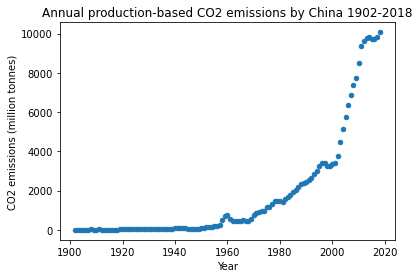

In [4]:
#Scatter plot : Plot the scatter plot of yearly average_co2_concentrations variable 

df.plot.scatter(x="year",y="co2")
plt.xlabel('Year') 
plt.ylabel('CO2 emissions (million tonnes)') 
plt.title ('Annual production-based CO2 emissions by China 1902-2018')
plt.show()

## Linear Regression and Polynomial  Regression
We will try to apply Linear Regression and Polynomial  Regression Methods to the dataset. The comparision wil help us to understand which methods describes the data better.

## Part 1 : Linear Regression
Let us try to fit a Line to the data. Equation of a line is y = b0 + b1*x, where b0 is Y-intercept and b1 is the slope.

In [5]:
# Use NumPy library to convert the DataFrame to NumPy Array which would be used in the further steps. 
x=[]
y=[]
x=df['year'].to_numpy()
y=df['co2'].to_numpy()
n = np.size(x)  # number of observations/points

In [6]:
# Function: Calculate Regression Coefficients : b0 is Y-intercept and b1 is slope for a Regression Line b0 + b1*x  
def estimate_coef(x, y): 
     
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
   
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
# Function: Plot the scatter plot and Regression Line as per the predicted coefficients
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
      
    # plot the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # prepare and render the plot 
    plt.xlabel('Year') 
    plt.ylabel('CO2 emissions (million tonnes)') 
    plt.title ('Annual production-based CO2 emissions by China 1902-2018')     
    plt.title ('Annual production-based CO2 emissions by China 1902-2018') 
    plt.legend(["Linear Regression","Actual"], loc ="lower right")
    plt.show() 

# Function: Calculate RMSE (Root Mean-Squared Error values)    
def rmse(b,y):
    predict=[]
    for i in range(0,n):
        predict.append(b[0]+b[1]*x[i])
    predict=np.array(predict)    
    rmse_linear = np.sqrt(sklearn.metrics.mean_squared_error(y,predict))
    return(rmse_linear)

# Function: Call the functions in a particular order
def main(x,y): 
    # Estimate Regression Coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients of the line y = b0 + b1*x are:\nb0 = {}   \nb1 = {}".format(b[0], b[1])) 
      
    # Check the Root Mean Sqaured Error
    residual_error = rmse(b,y)
    print("RMSE Value by using Linear Regression is=",residual_error)
    
    # Plot regression line 
    plot_regression_line(x, y, b)
    

Estimated coefficients of the line y = b0 + b1*x are:
b0 = -127261.4302050189   
b1 = 65.84592892895174
RMSE Value by using Linear Regression is= 1705.0661924295737


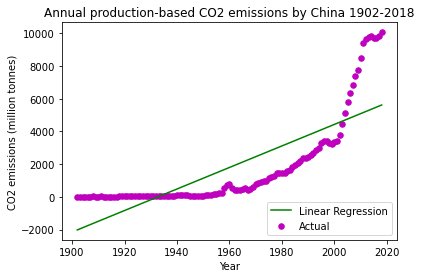

In [7]:
#Call the main function for Linear Regression   
if __name__ == "__main__": 
         main(x,y)

## Part 2: Polynomial Regression


Polynomial Regession is used to fit a non-linear model to the data. In Polynomial Regession, relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

In [8]:
import chart_studio
import chart_studio.plotly as py
import plotly.express as px

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Function: Visualizing the Polymonial Regression results
# prepare and render the plot 
def viz_polymonial(X,Y, Y_poly,poly_degree):
    plt.scatter(X,Y, color='red')
    plt.plot(X,Y_poly, color='blue')
    plt.xlabel('Year') 
    plt.ylabel('CO2 emissions (million tonnes)') 
    plt.title ('Annual production-based CO2 emissions by China 1902-2018') 
    plt.legend(["Polynomial Regression degree "+ str(poly_degree),"Actual"], loc ="upper left")
    plt.show()
    
    return

# Function: Calculating the Polymonial Regression values
def poly_regression(degree):
    X = df.iloc[:, 0:1].values                # Consider the Year column as an array
    poly_reg = PolynomialFeatures(degree)     # Get ready for a polynomial regression of given degree
    X_poly = poly_reg.fit_transform(X)        # Compute number of output features, then Transform data to polynomial features
    lin_reg = LinearRegression()              # 
    lin_reg.fit(X_poly,y)                     # Fit a Linear Regression for Transformed data
    Y_poly = lin_reg.predict(X_poly)          # Predict values 
        
    # Check the Root Mean Sqaured Error
    rmse_poly = np.sqrt(sklearn.metrics.mean_squared_error(y,Y_poly))
    print("RMSE Value by using Polynomial Regression is=",rmse_poly)   
       
     # Visualize the results
    viz_polymonial(X,y,Y_poly,degree)                
    
    return

RMSE Value by using Polynomial Regression is= 443.9556515605107


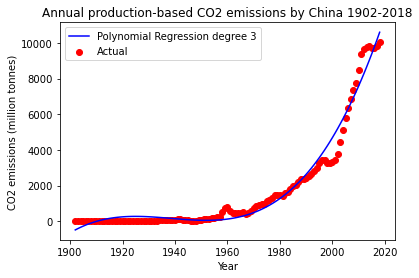

In [9]:
#Call the  function for Polynomial Regression for a particular degree   
poly_regression(3)

## Changing the degree of the Polynomial
One can try different values for the degree of the Polynomial and see the difference between the results visually and also by comparing it using the RMSE value.